In [2]:
# System Libraries
from tensorflow import keras
import tensorflow as tf
import numpy as np
import importlib
import sys

sys.path.append("../")

# User Libraries
from modules import Chapter_01
from modules import Common

# Reload Libraries
importlib.reload(Chapter_01)
importlib.reload(Common)

<module 'modules.Common' from '/Users/siddiqui/Projects/concepts/concepts-ai/practices/../modules/Common.py'>

In [9]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1).astype(np.float32) / 255
x_test = x_test.reshape(10000, 28, 28, 1).astype(np.float32) / 255
x_train, y_train = Common.shuffle_data(x_train, y_train)
x_test, y_test = Common.shuffle_data(x_test, y_test)

In [7]:
input = keras.Input(shape=(28, 28, 1))
x = keras.layers.Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu)(input)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu)(input)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu)(input)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
output = keras.layers.Dense(units=10, activation=tf.nn.softmax)(x)
model = keras.Model(inputs=input, outputs=output)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
    optimizer=keras.optimizers.RMSprop(),
)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 21632)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                216330    
                                                                 
Total params: 217610 (850.04 KB)
Trainable params: 217610 (850.04 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

Metrics: 
loss, sparse_categorical_accuracy, val_loss, val_sparse_categorical_accuracy, 


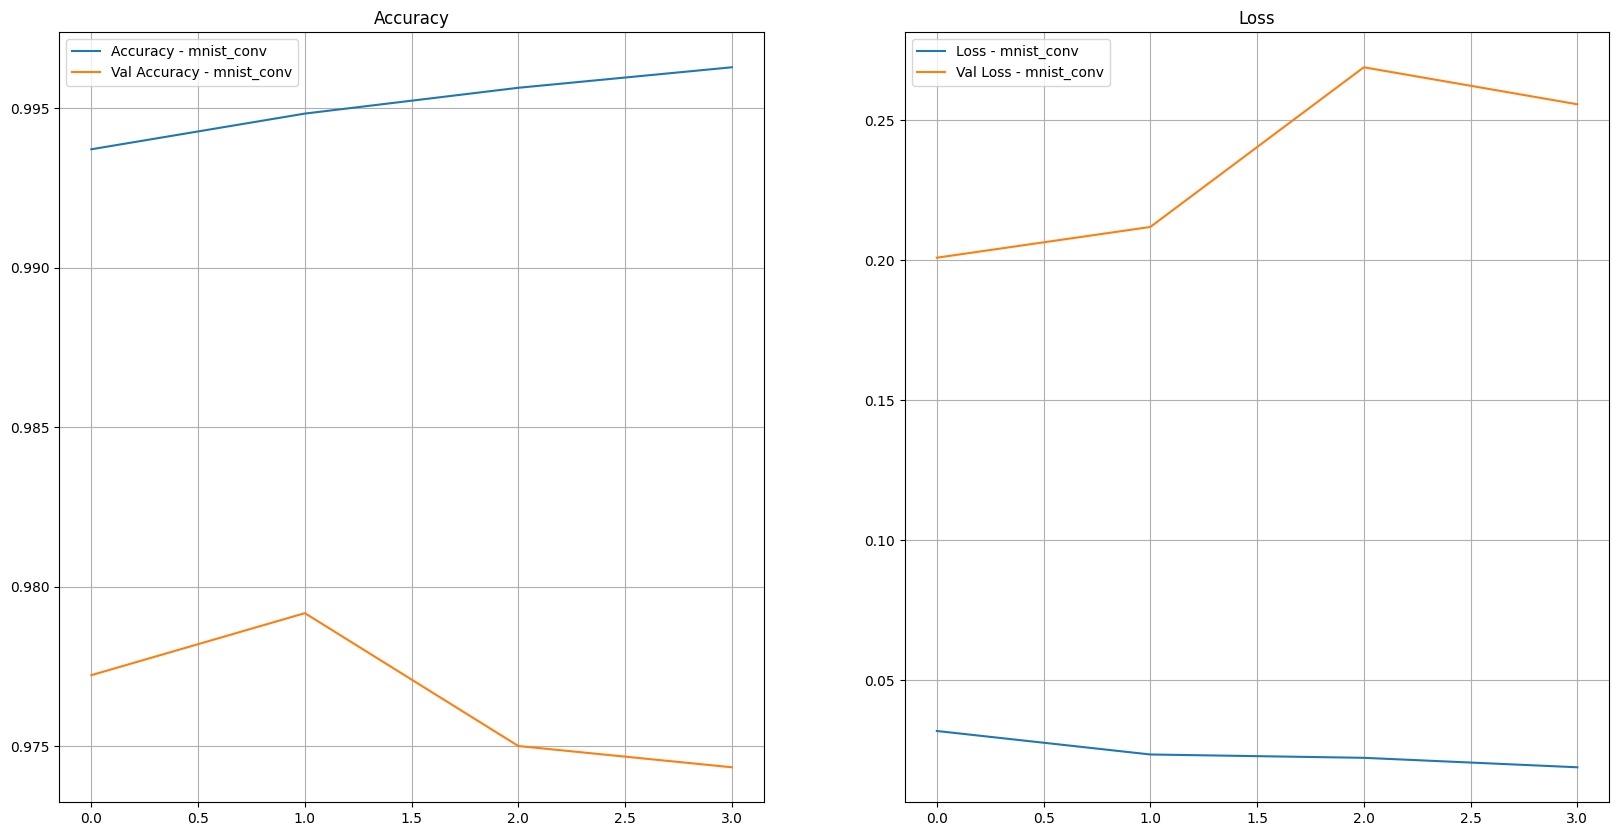

313/313 [==============================] - 1s 2ms/step - loss: 0.2760 - sparse_categorical_accuracy: 0.9723
0.27598726749420166
0.9722999930381775


In [12]:
history = model.fit(
    x=x_train,
    y=y_train,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_sparse_categorical_accuracy", patience=2),
        keras.callbacks.TensorBoard(log_dir="../resources/logs"),
    ],
    validation_split=0.3,
    epochs=10,
    verbose=False,
)
Common.plot(data=[history], labels=["mnist_conv"])
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accuracy)